# Smell Loss Monte Carlo Simulation

## Purpose
This project seeks to explore the health risks leading to smell loss across the U.S. population. This will be done using three datasets. The 2012 and 2014 versions of the National Health and Nutrition Examination Survey both of which include evaluation of smell and taste function, as well as data collected by the Global Consortium for Chemosensory Research on COVID-19 symptoms including smell loss and various health and lifestyle factors.

## Hypotheses
Geographic & Smoking: Areas with higher smoking levels in 2011-2012 will have higher probability smell loss in 2013-2014.

Taste & Flavor: Loss of smell will be correlated with loss of flavor but not loss of taste.

Income & Smell: Areas with higher income will have a lower probability of smell loss.

## Design
### Variables
- smoking
- age
- geography

## Results so far
Smell loss based on viral infection (COVID-19 or flu/cold) for each year

In [6]:
import matplotlib.pyplot as plt
import numpy as np

from smell_loss_simulation import run_simulation

pop_size = 1000
iterations = 100
infection_distance = 5

smell_loss_2011, population_2011 = run_simulation(pop_size, iterations, infection_distance, year=2011)

smell_loss_2014, population_2014 = run_simulation(pop_size, iterations, infection_distance, year=2014)

smell_loss_2021, population_2021 = run_simulation(pop_size, iterations, infection_distance, year=2021)



Iteration   0: Smell Loss Percentage: 6.90%
Iteration   1: Smell Loss Percentage: 10.20%
Iteration   2: Smell Loss Percentage: 10.10%
Iteration   3: Smell Loss Percentage: 10.10%
Iteration   4: Smell Loss Percentage: 10.10%
Iteration   5: Smell Loss Percentage: 10.10%
Iteration   6: Smell Loss Percentage: 10.10%
Iteration   7: Smell Loss Percentage: 10.10%
Iteration   8: Smell Loss Percentage: 10.10%
Iteration   9: Smell Loss Percentage: 10.10%
Iteration  10: Smell Loss Percentage: 10.10%
Iteration  11: Smell Loss Percentage: 10.10%
Iteration  12: Smell Loss Percentage: 10.10%
Iteration  13: Smell Loss Percentage: 10.10%
Iteration  14: Smell Loss Percentage: 10.10%
Iteration  15: Smell Loss Percentage: 10.10%
Iteration  16: Smell Loss Percentage: 10.10%
Iteration  17: Smell Loss Percentage: 10.10%
Iteration  18: Smell Loss Percentage: 10.10%
Iteration  19: Smell Loss Percentage: 10.10%
Iteration  20: Smell Loss Percentage: 10.10%
Iteration  21: Smell Loss Percentage: 10.10%
Iteration  

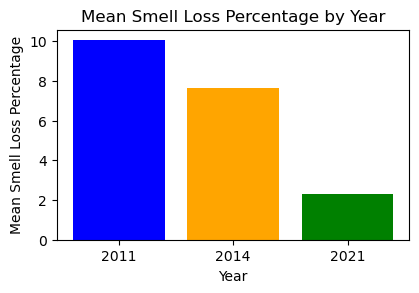

In [7]:
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.bar(['2011', '2014', '2021'], [np.mean(smell_loss_2011), np.mean(smell_loss_2014), np.mean(smell_loss_2021)], color=['blue', 'orange', 'green'])
plt.title('Mean Smell Loss Percentage by Year')
plt.xlabel('Year')
plt.ylabel('Mean Smell Loss Percentage')

plt.show()

Text(0, 0.5, 'Age')

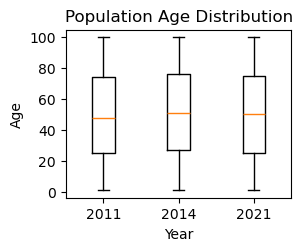

In [8]:
# Box plot for population ages
ages_2011 = [person.age for person in population_2011]
ages_2014 = [person.age for person in population_2014]
ages_2021 = [person.age for person in population_2021]

plt.subplot(2, 2, 2)
plt.boxplot([ages_2011, ages_2014, ages_2021], labels=['2011', '2014', '2021'])
plt.title('Population Age Distribution')
plt.xlabel('Year')
plt.ylabel('Age')

In [9]:
from smell_loss_simulation import Person, calculate_smoking_probability, run_simulation, calculate_smell_loss_probability

population_size = 1000
num_iterations = 100
transmission_distance = 5

aggregate_stats_2011_2012, population_2011_2012 = run_simulation(population_size, num_iterations, transmission_distance, year=2011)
smoking_prob_2011_2012 = calculate_smoking_probability(2011)
num_smokers_2011_2012 = (sum(person.is_smoker for person in population_2011_2012) / population_size) * 100
num_smell_loss_2011_2012 = (sum(person.smell_loss for person in population_2011_2012) / population_size) * 100
num_taste_loss_2011_2012 = (sum(person.taste_loss for person in population_2011_2012) / population_size) * 100
num_flavor_loss_2011_2012 = (sum(person.flavor_loss for person in population_2011_2012) / population_size) * 100

aggregate_stats_2013_2014, population_2013_2014 = run_simulation(population_size, num_iterations, transmission_distance, year=2014)
smoking_prob_2013_2014 = calculate_smoking_probability(2014)
smell_loss_prob_2013_2014 = calculate_smell_loss_probability(2014)
num_smokers_2013_2014 = (sum(person.is_smoker for person in population_2013_2014) / population_size) * 100
num_smell_loss_2013_2014 = (sum(person.smell_loss for person in population_2013_2014) / population_size) * 100
num_taste_loss_2013_2014 = (sum(person.taste_loss for person in population_2013_2014) / population_size) * 100
num_flavor_loss_2013_2014 = (sum(person.flavor_loss for person in population_2013_2014) / population_size) * 100

aggregate_stats_2020_2021, population_2020_2021 = run_simulation(population_size, num_iterations, transmission_distance, year=2021)
smoking_prob_2020_2021 = calculate_smoking_probability(2021)
num_smokers_2020_2021 = (sum(person.is_smoker for person in population_2020_2021) / population_size) * 100
num_smell_loss_2020_2021 = (sum(person.smell_loss for person in population_2020_2021) / population_size) * 100
num_taste_loss_2020_2021 = (sum(person.taste_loss for person in population_2020_2021) / population_size) * 100
num_flavor_loss_2020_2021 = (sum(person.flavor_loss for person in population_2020_2021) / population_size) * 100


print("Smoking levels in 2011-2012:", smoking_prob_2011_2012)
print("Smell loss probability in 2013-2014:", smell_loss_prob_2013_2014)


Iteration   0: Smell Loss Percentage: 5.80%
Iteration   1: Smell Loss Percentage: 10.40%
Iteration   2: Smell Loss Percentage: 11.00%
Iteration   3: Smell Loss Percentage: 11.00%
Iteration   4: Smell Loss Percentage: 11.00%
Iteration   5: Smell Loss Percentage: 11.00%
Iteration   6: Smell Loss Percentage: 11.00%
Iteration   7: Smell Loss Percentage: 11.00%
Iteration   8: Smell Loss Percentage: 11.00%
Iteration   9: Smell Loss Percentage: 11.00%
Iteration  10: Smell Loss Percentage: 11.00%
Iteration  11: Smell Loss Percentage: 11.00%
Iteration  12: Smell Loss Percentage: 11.00%
Iteration  13: Smell Loss Percentage: 11.00%
Iteration  14: Smell Loss Percentage: 11.00%
Iteration  15: Smell Loss Percentage: 11.00%
Iteration  16: Smell Loss Percentage: 11.00%
Iteration  17: Smell Loss Percentage: 11.00%
Iteration  18: Smell Loss Percentage: 11.00%
Iteration  19: Smell Loss Percentage: 11.00%
Iteration  20: Smell Loss Percentage: 11.00%
Iteration  21: Smell Loss Percentage: 11.00%
Iteration  

In [2]:
import numpy as np
from smell_loss_simulation import run_simulation, load_smell_loss_data, load_case_data, calculate_taste_loss_probability, calculate_flavor_loss_probability

pop_size = 1000
iterations = 100
infection_distance = 5
years = [2011, 2014, 2021]

results = {}
for year in years:
    smell_loss_prob, flavor_loss_prob, taste_loss_prob = [], [], []
    for _ in range(iterations):
        _, population = run_simulation(pop_size, 1, infection_distance, year)
        smell_loss = sum(person.smell_loss for person in population)
        flavor_loss = sum(person.flavor_loss for person in population)
        taste_loss = sum(person.taste_loss for person in population)
        total_population = len(population)
        smell_loss_prob.append(smell_loss / total_population)
        flavor_loss_prob.append(flavor_loss / total_population)
        taste_loss_prob.append(taste_loss / total_population)
    results[year] = {
        'smell_loss_prob': smell_loss_prob,
        'flavor_loss_prob': flavor_loss_prob,
        'taste_loss_prob': taste_loss_prob
    }

correlation_results = {}
for year, data in results.items():
    smell_loss_prob = data['smell_loss_prob']
    flavor_loss_prob = data['flavor_loss_prob']
    taste_loss_prob = data['taste_loss_prob']
    correlation_smell_flavor = np.corrcoef(smell_loss_prob, flavor_loss_prob)[0, 1]
    correlation_smell_taste = np.corrcoef(smell_loss_prob, taste_loss_prob)[0, 1]
    correlation_flavor_taste = np.corrcoef(flavor_loss_prob, taste_loss_prob)[0, 1]
    correlation_results[year] = {
        'correlation_smell_flavor': correlation_smell_flavor,
        'correlation_smell_taste': correlation_smell_taste,
        'correlation_flavor_taste': correlation_flavor_taste
    }

for year, data in correlation_results.items():
    print(f"Year: {year}")
    print(f"Correlation between smell loss and flavor loss: {data['correlation_smell_flavor']:.2f}")
    print(f"Correlation between smell loss and taste loss: {data['correlation_smell_taste']:.2f}")
    print(f"Correlation between flavor loss and taste loss: {data['correlation_flavor_taste']:.2f}")
    print()


Iteration   0: Smell Loss Percentage: 5.50%
Iteration   0: Smell Loss Percentage: 4.00%
Iteration   0: Smell Loss Percentage: 6.50%
Iteration   0: Smell Loss Percentage: 5.10%
Iteration   0: Smell Loss Percentage: 7.20%
Iteration   0: Smell Loss Percentage: 4.70%
Iteration   0: Smell Loss Percentage: 5.40%
Iteration   0: Smell Loss Percentage: 5.60%
Iteration   0: Smell Loss Percentage: 4.70%
Iteration   0: Smell Loss Percentage: 4.50%
Iteration   0: Smell Loss Percentage: 5.00%
Iteration   0: Smell Loss Percentage: 6.60%
Iteration   0: Smell Loss Percentage: 6.30%
Iteration   0: Smell Loss Percentage: 7.20%
Iteration   0: Smell Loss Percentage: 7.10%
Iteration   0: Smell Loss Percentage: 5.10%
Iteration   0: Smell Loss Percentage: 5.60%
Iteration   0: Smell Loss Percentage: 6.00%
Iteration   0: Smell Loss Percentage: 4.80%
Iteration   0: Smell Loss Percentage: 4.50%
Iteration   0: Smell Loss Percentage: 5.70%
Iteration   0: Smell Loss Percentage: 5.20%
Iteration   0: Smell Loss Percen

In [3]:
years = [2011, 2014]

results = {}
for year in years:
    smell_loss_prob, poverty_prob = [], []
    for _ in range(iterations):
        _, population = run_simulation(pop_size, 1, infection_distance, year)
        smell_loss = sum(person.smell_loss for person in population)
        poverty = sum(person.poverty for person in population)
        total_population = len(population)
        smell_loss_prob.append(smell_loss / total_population)
        poverty_prob.append(poverty / total_population)
    results[year] = {
        'smell_loss_prob': smell_loss_prob,
        'poverty_prob': poverty_prob
    }

correlation_results = {}
for year, data in results.items():
    smell_loss_prob = data['smell_loss_prob']
    poverty_prob = data['poverty_prob']
    correlation_smell_poverty = np.corrcoef(smell_loss_prob, poverty_prob)[0, 1]
    correlation_results[year] = {
        'correlation_smell_poverty': correlation_smell_poverty
    }

for year, data in correlation_results.items():
    print(f"Year: {year}")
    print(f"Correlation between smell loss and poverty: {data['correlation_smell_poverty']:.2f}")
    print()


Iteration   0: Smell Loss Percentage: 6.90%
Iteration   0: Smell Loss Percentage: 5.10%
Iteration   0: Smell Loss Percentage: 6.10%
Iteration   0: Smell Loss Percentage: 6.00%
Iteration   0: Smell Loss Percentage: 6.80%
Iteration   0: Smell Loss Percentage: 5.30%
Iteration   0: Smell Loss Percentage: 5.00%
Iteration   0: Smell Loss Percentage: 5.60%
Iteration   0: Smell Loss Percentage: 6.00%
Iteration   0: Smell Loss Percentage: 5.40%
Iteration   0: Smell Loss Percentage: 5.00%
Iteration   0: Smell Loss Percentage: 5.20%
Iteration   0: Smell Loss Percentage: 3.90%
Iteration   0: Smell Loss Percentage: 5.50%
Iteration   0: Smell Loss Percentage: 5.80%
Iteration   0: Smell Loss Percentage: 5.60%
Iteration   0: Smell Loss Percentage: 4.80%
Iteration   0: Smell Loss Percentage: 6.40%
Iteration   0: Smell Loss Percentage: 5.30%
Iteration   0: Smell Loss Percentage: 4.70%
Iteration   0: Smell Loss Percentage: 5.50%
Iteration   0: Smell Loss Percentage: 5.10%
Iteration   0: Smell Loss Percen

In [4]:
# TODO 
# infected_2011 = [person.infected_status for person in population_2011]
# infected_2014 = [person.infected_status for person in population_2014]
# infected_2021 = [person.infected_status for person in population_2021]
# 
# plt.figure(figsize=(10, 6))
# 
# plt.subplot(2, 2, 3)
# plt.scatter(range(len(infected_2011)), infected_2011, color='blue', label='2011')
# plt.scatter(range(len(infected_2014)), infected_2014, color='orange', label='2014')
# plt.scatter(range(len(infected_2021)), infected_2021, color='green', label='2021')
# plt.title('Infected Status vs. Year')
# plt.xlabel('Person')
# plt.ylabel('Infected Status')
# plt.legend()
# 
# plt.tight_layout()
# plt.show()

In [5]:
# TODO
# plt.subplot(2, 2, 3)
# plt.scatter(ages_2011, infected_2011, color='blue', label='2011')
# plt.scatter(ages_2014, infected_2014, color='orange', label='2014')
# plt.scatter(ages_2021, infected_2021, color='green', label='2021')
# plt.title('Infected Status vs. Age')
# plt.xlabel('Age')
# plt.ylabel('Infected Status')
# plt.legend()
# 
# plt.tight_layout()
# plt.show()